In [1]:
# This setups everything

import numpy as np
from qiskit import *
%matplotlib inline

In [2]:
# The basic elements for our program are: 1) the QuantumCircuit and 2) the QuantumRegister

# This creates a Quantum Register with 3 qubits

q = QuantumRegister(3,'q') # naming the quantreg is optional and not required

# This creates a Quantum Circuit acting on the q register

circ = QuantumCircuit(q)

# --> Now we can add gates to perform different operations

In [3]:
# This applies a Hadamard gate on qubit 0

circ.h(q[0])

# Now we apply two cnot gates over qubits 1 and 2 controlled by qubit 1

circ.cx(q[0],q[1])
circ.cx(q[0],q[2])

# NOTE: Since we have named 'q' our quantum register, we must call the different
# j-qubit by using q[j]


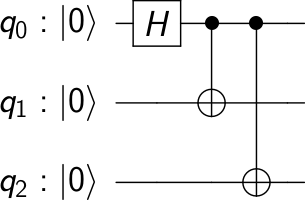

In [7]:
# We are going to visualize our circuit by drawing it

circ.draw(output='latex') # Leave the circ.draw() in order to draw with the default conf. Also try 'mpl'


In [11]:
# =======================================================================

# SIMULATING CIRCUITS USING QISKIT AER

# We will use the statevector_simulator. This returns the quantum state

# =======================================================================

# First of all, we need to import Aer

from qiskit import BasicAer

# Now we run the quantum circuit on a statevector simulator backend
# The qiskit interface has three parts:
#  - The provider : Aer, in this case
#  - The backend : it runs the quantum circuit
#  - The job : it keeps track of the submitted job

backend = BasicAer.get_backend('statevector_simulator') #->basically this runs the circuit

# Now we create a Quantum Program for execution

job = execute(circ,backend)

status = job.status()
result = job.result() # this gives the final result

# In order to get the final state:

outputstate = result.get_statevector(circ,decimals=3)
print(outputstate)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


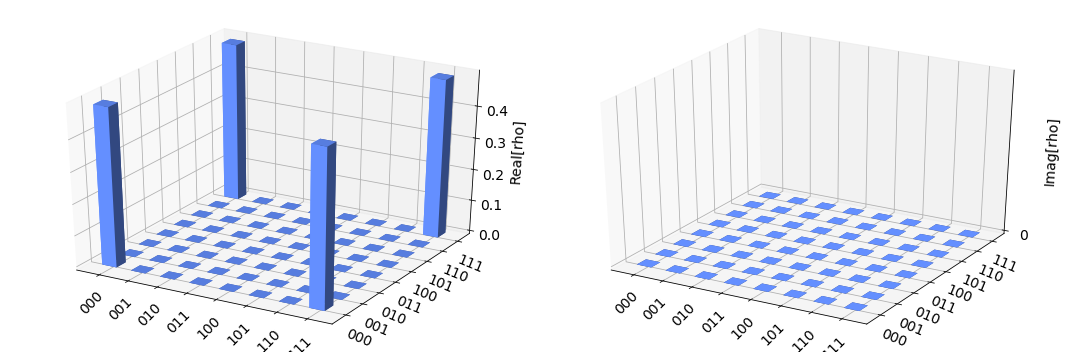

In [10]:
# Qiskit also provides a set of visualization tools to allow us to view 
# these results

# We will import one of these tools

from qiskit.visualization import plot_state_city 

# And use it to plot

plot_state_city(outputstate)

In [12]:
# We can also simulate the circuit on a UNITARY SIMULATOR BACKEND

backend2 = BasicAer.get_backend('unitary_simulator')
job2 = execute(circ,backend2)
result2 = job2.result()

# And show them 

print(result2.get_unitary(circ,decimals=3))

[[ 0.707+0.j  0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j  0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j  0.707+0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]]


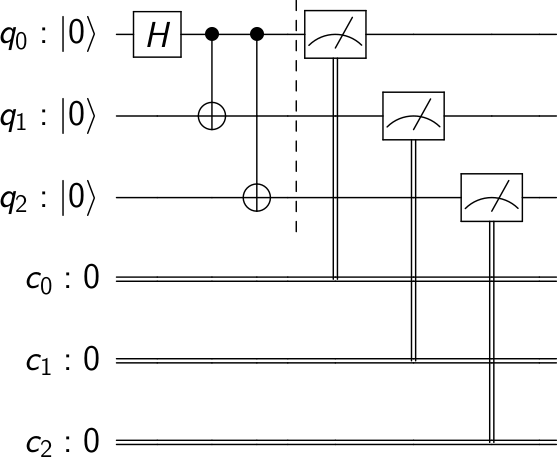

In [15]:
# =======================================================================

# MEASURING WITH QISKIT

# =======================================================================

# We need to add measurements to the original circuit. This will be done
# using a different Aer backend and adding both of the circuits

# This creates a CLASSICAL REGISTER with 3 bits. This register is important:
# while the quantum states are saved in a quantum register, we need to get
# information from them. This information is classical and therefore needs
# to be stored in a classical register

# We have to create the Classical Register with 3 bits

c = ClassicalRegister(3,'c')

# We now create a Quantum Circuit for this register

measure = QuantumCircuit(q,c)

# This simply draws a barrier in the circuit

measure.barrier(q)

# And this performs the measurement in each qubit

measure.measure(q,c)

# Now we can add the circuits and draw the final result

qc = circ + measure
qc.draw(output='latex')


In [18]:
# SIMULATING THE MEASUREMENT

# To simulate this circuit (which includes the measurement) we will use the
# qasm_simulator. Each run of this circuit will yield either the bitstring
# 000 or 111, each one of them with prob = 1/2

# We create a backend for the simulation

backend_sim = BasicAer.get_backend('qasm_simulator')

# Now we execute the circuit on the qasm simulator. We repeat the experiment
# 1024 times

job_sim = execute(qc,backend_sim,shots=1024)

# Finally we grab the results

result_sim = job_sim.result()

In [20]:
# In the cell below, we created a result object. Now we can manipulate it:

counts = result_sim.get_counts(qc) # The function get_counts(circuit) lets us access the counts
print(counts)

{'111': 534, '000': 490}


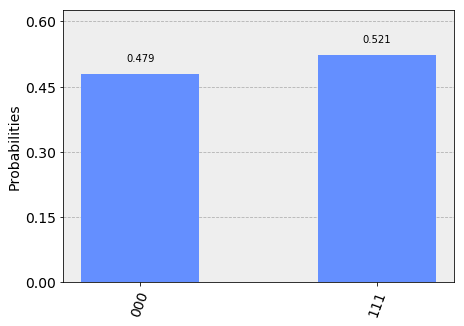

In [21]:
# There is also a function which allows us to view the outcomes using a 
# HISTOGRAM

from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [22]:
# ========================================================================
# RUNNING CIRCUITS ON A REAL QC : THE IBMQ PROVIDER
# ========================================================================

# The IBM Q provider lets us run our circuit on real devices. We need to
# import it:

from qiskit import IBMQ

# Im linking this program with my test account by using my token:

IBMQ.save_account('5acf5b9794cd56709a04e932a3ded43fbcdb316c1621e8962ec93352a182ef269ce5b3158889c267dc04fa207e71abb60b0d5c11e69a71602679dbb5a5c05364')            

In [23]:
# Now we have to load the account

IBMQ.load_accounts(hub=None)

In [24]:
# And check the available backends

print("Available backends:")
IBMQ.backends()

Available backends:


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQSimulator('ibmq_qasm_simulator') from IBMQ()>]

In [27]:
# We will now find the device with the least busy queue that can support
# our program

from qiskit.providers.ibmq import least_busy

large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration().n_qubits<10 and 
                                    not x.configuration().simulator)

backend = least_busy(large_enough_devices)
print("The best backend is "+ backend.name())

The best backend is ibmqx2


In [31]:
# To run the circuit on the backend, we need to specify the number of shots
# and the number of credits willing to spend to run the circuit

from qiskit.tools.monitor import job_monitor
shots = 1025 
max_credits = 3

job_exp = execute(qc,backend = backend, shots = shots, max_credits = max_credits)
job_monitor(job_exp)

NameError: name 'ibmqx4' is not defined

In [29]:
result_exp = job_exp.result()

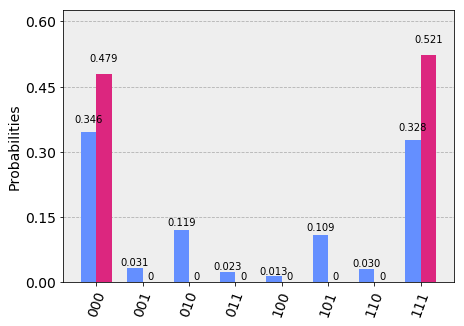

In [30]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [34]:
# We can also simulate circuits using a HPC simulator from the IBM Q provider
# It is called ibm_qasm_simulator and is capable of simulating up to 32 qubits

simulator_backend = IBMQ.get_backend('ibmq_qasm_simulator', hub=None)


In [35]:
shots = 1024 
max_credits = 3 

job_hpc = execute(qc,backend=simulator_backend,shots=shots,max_credits=max_credits)

In [36]:
result_hpc = job_hpc.result()

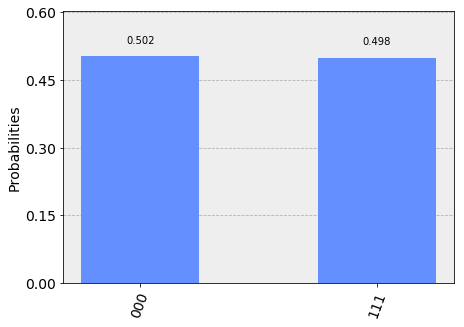

In [37]:
counts_hpc = result_hpc.get_counts(qc)
plot_histogram(counts_hpc)

In [38]:
# ========================================================================

# RETRIEVING A PREVIOUSLY RAN JOB

# ========================================================================

# We can find our jobs ID

jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))

JOB ID: 5d017c4b34eecc006fd43481


In [39]:
# Using retrieve_job we can reconstructed a given job from the backend

job_get = backend.retrieve_job(jobID)

In [40]:
job_get.result().get_counts(qc)

{'101': 112,
 '001': 32,
 '000': 355,
 '011': 24,
 '111': 336,
 '100': 13,
 '010': 122,
 '110': 31}

Podemos convertir esto en texto